In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
df1 = pd.read_csv('pricee.csv')

df2 = df1.copy()

df2 = df2.drop(['area_type', 'availability', 'society'], axis=1)

df2.head()

df2['size'].unique

df2 = df2.dropna()

df2.head()

df2['BHK'] = df2['size'].apply( lambda x : int(x.split(' ')[0]))

df2.head()

df2 = df2.drop(['size'],axis=1)

df2.head(30)

def value_change(x):
    tokens= x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

value_change('110-90')

df2['total_sqft'] = df2['total_sqft'].apply(value_change)

type(df2['total_sqft'])

df2.shape

(12710, 6)

In [3]:
df2.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [4]:
df2['Price_perSq'] = df2['price']*100000/df2['total_sqft']

In [5]:
df2.head()

,location,total_sqft,bath,balcony,price,BHK,Price_perSq
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [6]:
df2.Price_perSq.describe()

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: Price_perSq, dtype: float64

In [7]:
df2['location'] = df2.location.apply(lambda x : x.strip())
location_stats = df2.location.value_counts(ascending = False)

In [10]:
df2.location.value_counts

<bound method IndexOpsMixin.value_counts of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 12710, dtype: object>

In [15]:
location_stats.values

array([515, 372, 302, ...,   1,   1,   1], dtype=int64)

In [16]:
location_stats.values.sum()

12710

In [17]:
len(location_stats)

1254

In [18]:
len(location_stats[location_stats<=10])

1017

In [19]:
location_stats_less10 = location_stats[location_stats<=10]
location_stats_less10

location
Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: count, Length: 1017, dtype: int64

In [20]:
len(df2.location.unique())

1254

In [21]:
df2.location = df2['location'].apply(lambda x: 'other' if x in location_stats_less10 else x)
len(df2.location.unique())

238

In [22]:
# df2 = df2.drop(['locstion'],axis=1)

In [23]:
df2[df2.total_sqft/df2.BHK<300]

,location,total_sqft,bath,balcony,price,BHK,Price_perSq
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...
13219,Laggere,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [24]:
df2.shape

(12710, 7)

In [25]:
df3 = df2[~(df2.total_sqft/df2.BHK<300)]
df3.shape

(12055, 7)

In [26]:
#Outlier Removal Using Mean and STD

In [27]:
df3.Price_perSq.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: Price_perSq, dtype: float64

In [28]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_perSq)
        st = np.std(subdf.Price_perSq)
        reduced_df = subdf[(subdf.Price_perSq>(m-st)) & (subdf.Price_perSq<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(9848, 7)

In [29]:
#Checking for 2BHK and 3 BHK

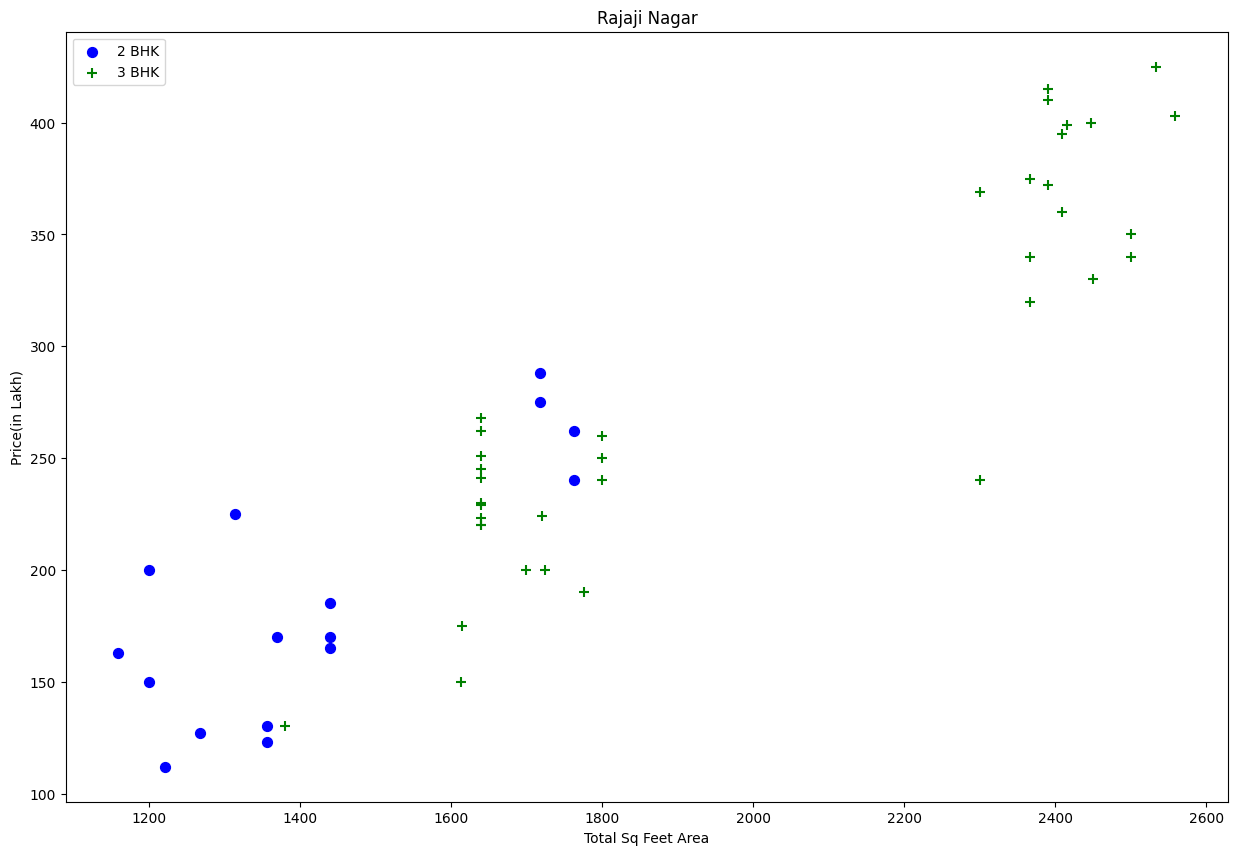

In [30]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location ==location) & (df.BHK==2)]
    bhk3 = df[(df.location ==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel('Total Sq Feet Area')
    plt.ylabel('Price(in Lakh)')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df4,"Rajaji Nagar")

In [31]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_perSq),
                'std': np.std(bhk_df.Price_perSq),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_perSq<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = df4.copy()
df5 = remove_bhk_outliers(df4)
# df8 = df7.copy()
df5.shape

(7025, 7)

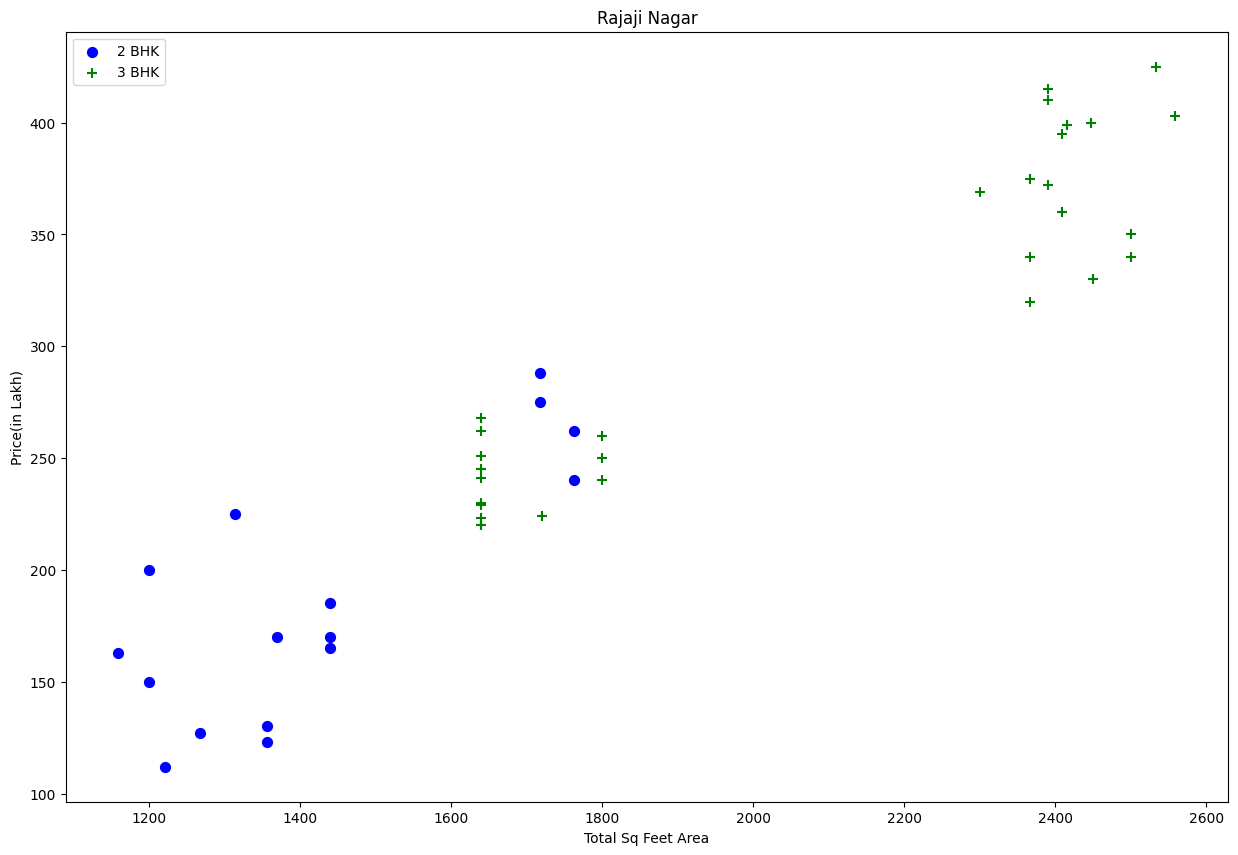

In [32]:
plot_scatter_chart(df5,"Rajaji Nagar")

Text(0, 0.5, 'Count')

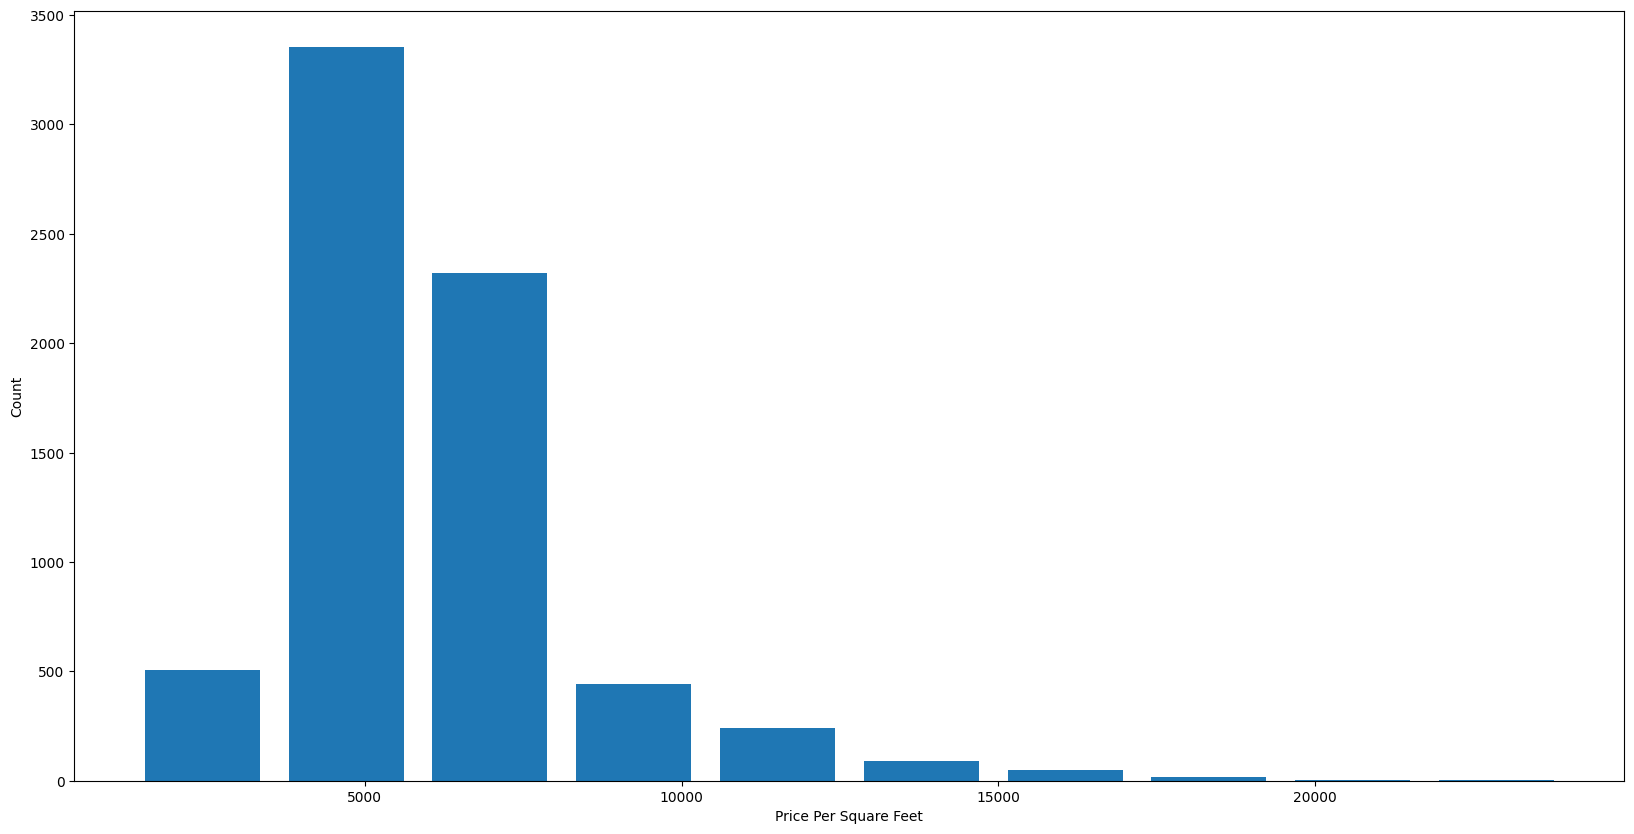

In [33]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.Price_perSq,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

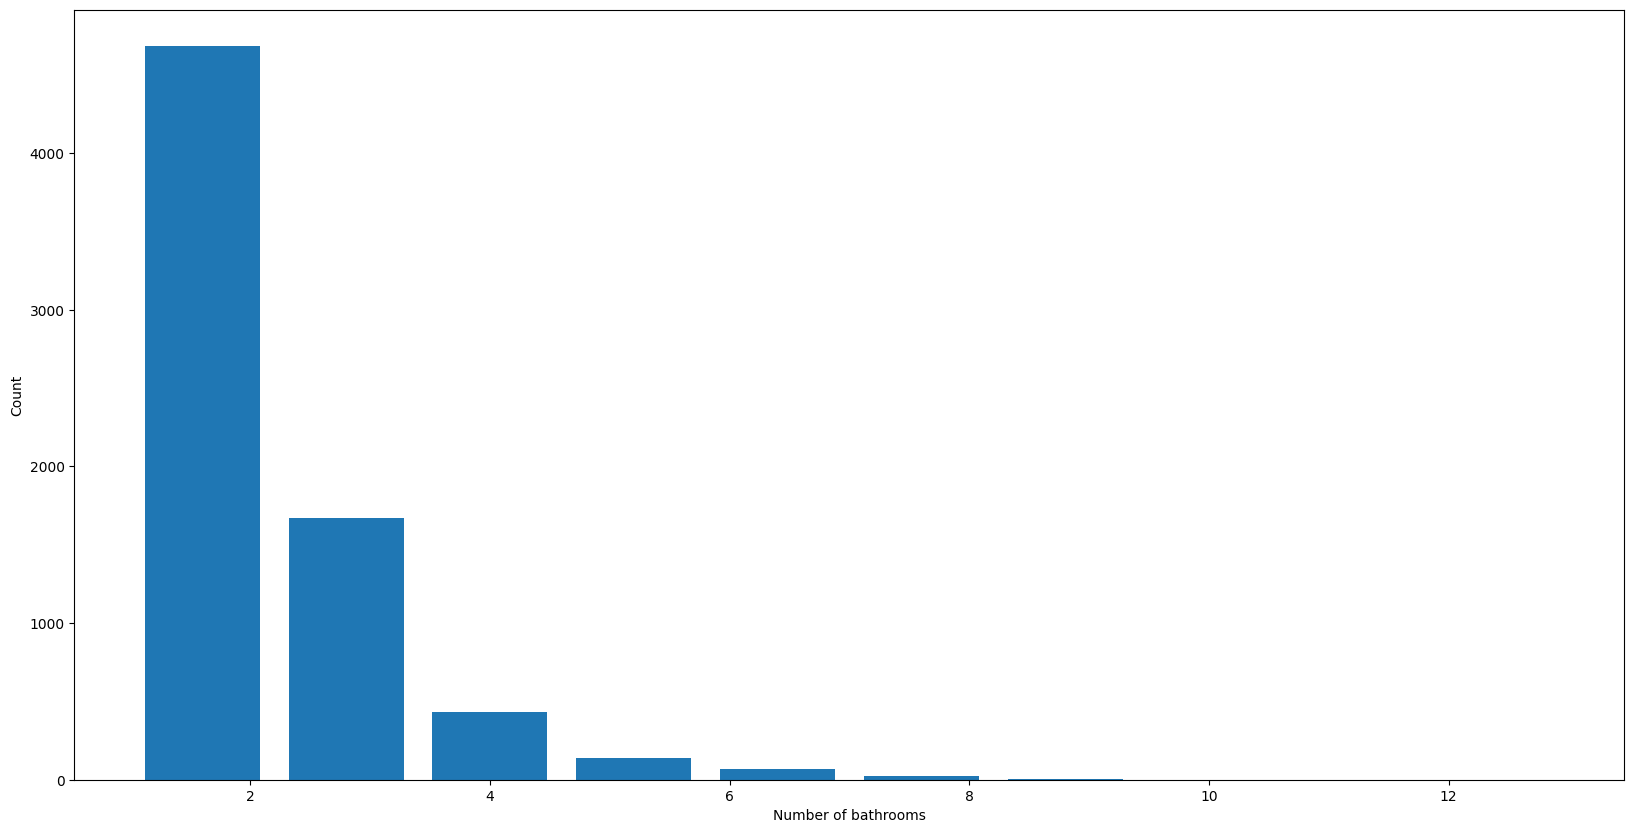

In [34]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [35]:
df5[df5.bath>10]

,location,total_sqft,bath,balcony,price,BHK,Price_perSq
9269,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [36]:
dummies = pd.get_dummies(df5.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df11 = pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,BHK,Price_perSq,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,balcony,price,BHK,Price_perSq,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,15017.543860,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,11901.840491,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
X = df12.drop(['price','balcony','Price_perSq'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [53]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7940063229181453

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76442425, 0.85522073, 0.86945271, 0.81986483, 0.87961399])

In [55]:
X_train.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
8576,1800.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2258,1305.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5737,950.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
def predict_price(location,sqft,bath,BHK):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [59]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.31276450568768

In [57]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


161.1522756123028

In [58]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))